In [2]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import insertion_deletion
from attrbench.lib import PixelMaskingPolicy
from experiments.lib.util import get_ds_model, get_n_pixels, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [8]:
BATCH_SIZE = 4
DATASET = "ImageNette"
MODEL = "resnet18"
METHOD = "IntegratedGradients"
MODE = "deletion"

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=False, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
pmp = PixelMaskingPolicy(0.)
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
n_pixels = get_n_pixels(DATASET)
mask_range = list(np.rint(np.linspace(0, 1, 5) * n_pixels).astype(np.int))

# Run Insertion/Deletion Curves

In [9]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
result, debug_data = insertion_deletion(batch, labels, model, method, mask_range, pmp, mode=MODE, debug_mode=True)

# Plot results

## Plot the original samples and their attributions

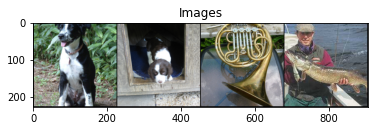

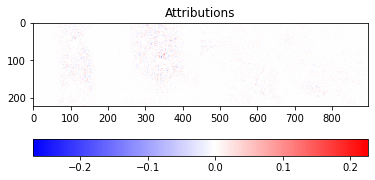

In [10]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

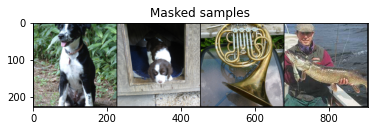

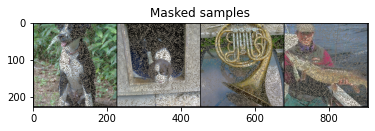

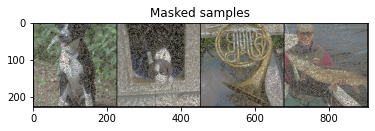

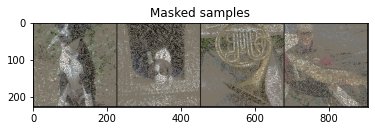

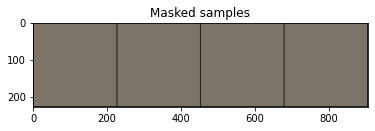

In [12]:
for n_idx, masked_samples in enumerate(debug_data["masked_samples"]):
    imshow(dataset.denormalize(masked_samples), title="Masked samples")